In [12]:
from rdkit import Chem
from rdkit.Chem import Draw, MolToSmiles
import pandas as pd

In [105]:
files = ['chembl26.sdf',
         'datawarrior.sdf',
         'literature_compilation.sdf',
         'sampl6.sdf',
         'settimo_et_al.sdf',
         'testDB.sdf']

In [106]:
mols = []
smiles = []
pka = []
ref = []
for file in files:
    supplier = Chem.SDMolSupplier(file)
    i=0
    for mol in supplier:
        try:
            mols.append(mol)
            smiles.append(MolToSmiles(mol))
            pka.append(mol.GetProp('pKa'))
            ref.append(file)
        except:
            print('error at file '+file+' at index '+str(i))
        i+=1

RDKit ERROR: [13:05:33] ERROR: Explicit valence for atom # 20 O, 3, is greater than permitted
RDKit ERROR: [13:18:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element '?' not found
RDKit ERROR: Violation occurred on line 91 in file /usr/local/miniconda/conda-bld/rdkit_1578668897892/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [13:18:09] ERROR: Element '?' not found


error at file datawarrior.sdf at index 4836
error at file datawarrior.sdf at index 5479


RDKit ERROR: [13:18:09] ERROR: moving to the begining of the next molecule
RDKit ERROR: [13:18:09] Explicit valence for atom # 20 O, 3, is greater than permitted
RDKit ERROR: [13:18:09] ERROR: Could not sanitize molecule ending on line 367621


In [107]:
solute = []
solvent = []
pkalist = []
pkaave = []
reflist = []
import statistics

for mol in set(smiles):
    #find all instances of the solute/solvent pair
    indices = [i for i, k in enumerate(smiles) if k == mol]
    
    pkas = [float(pka[i]) for i in indices]
    if len(pkas) == 1:
        dev = 0
    else:
        dev = statistics.stdev(pkas)
    if dev < 1:
        pkalist.append(pkas)
        pkaave.append(sum(pkas)/len(pkas))
        reflist.append([ref[i] for i in indices])
        solute.append(mol)

In [108]:
data = {'Solute SMILES': solute,
        'Solvent SMILES': ['O']*len(solute),
        'pKa (avg)': pkaave,
        'pKa (all)': pkalist,
        'Source': reflist}
aqueous_df = pd.DataFrame(data)
aqueous_df.to_csv('water_data.csv')

In [110]:
len(solute)

17664

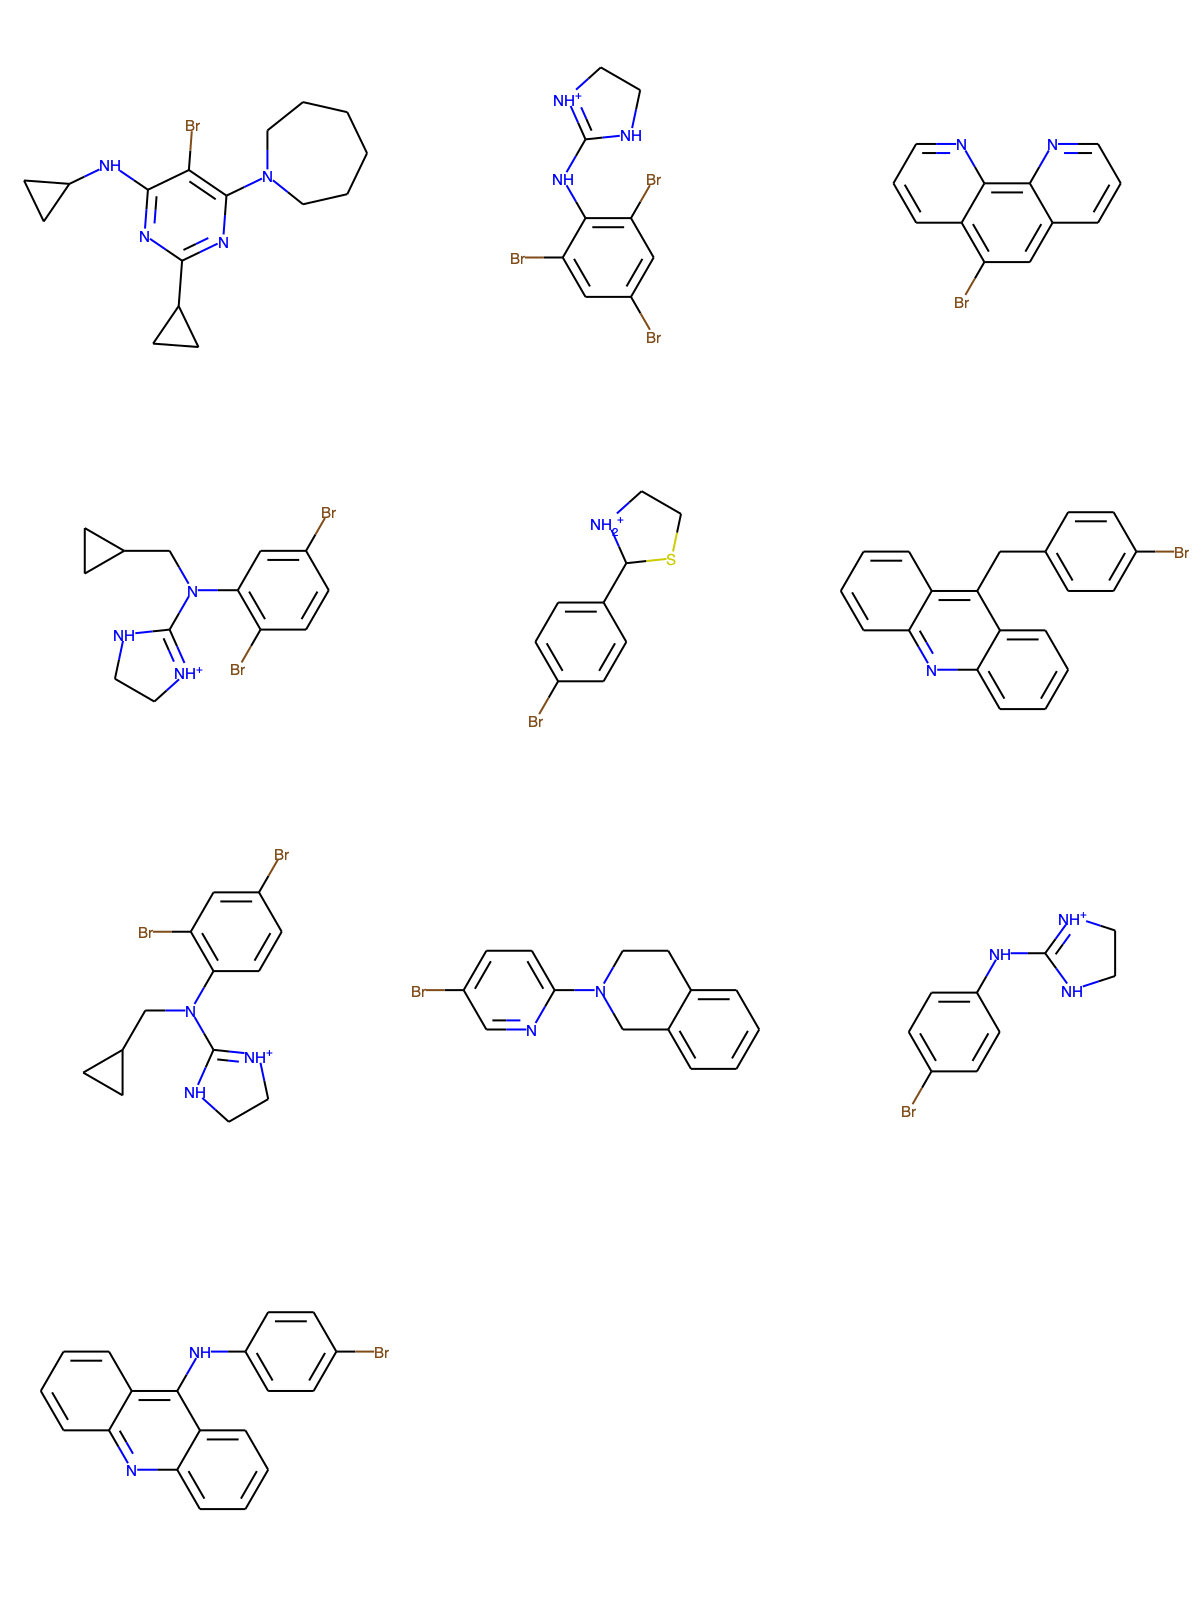

In [69]:
Draw.MolsToGridImage([molsH[x] for x in range(10)], subImgSize=[400,400])

In [43]:
print(smiles[2])

Brc1cccc(-c2nn[n-]n2)c1


In [ ]:
#confusion - some of these pka values might actually be pkah? 
#the original paper (machine learning meets pka) doesnt seem to care

In [71]:
mols = []
smiles = []
pka = []
ref = []
molsH = []
smilesH = []
pkaH = []
refH = []
supplier = Chem.SDMolSupplier('datawarrior.sdf')
for mol in supplier:
    if mol.GetProp('basicOrAcidic') == 'acidic':
        mols.append(mol)
        smiles.append(MolToSmiles(mol))
        pka.append(mol.GetProp('pKa'))

RDKit ERROR: [14:06:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element '?' not found
RDKit ERROR: Violation occurred on line 91 in file /usr/local/miniconda/conda-bld/rdkit_1578668897892/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:06:31] ERROR: Element '?' not found


AttributeError: 'NoneType' object has no attribute 'GetProp'

In [75]:
#hunt_et_al.sdf - from hunt et al 2020
mols = []
smiles = []
given_smiles = []
pka = []
ref = []
supplier = Chem.SDMolSupplier('hunt_et_al.sdf')
for mol in supplier:
    mols.append(mol)
    smiles.append(MolToSmiles(mol))
    given_smiles.append(mol.GetProp('conjugate_acid_smi'))
    pka.append(mol.GetProp('pKa'))
    ref.append('hunt_et_al')
#given_smiles is the conjugate acid, i think its fine but not sure

RDKit WARNING: [18:12:20] WARNING: not removing hydrogen atom without neighbors


In [74]:
for x in range(len(smiles)):
    print(x, smiles[x], given_smiles[x])

0 CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(C(C)=O)c1 CCCC(=O)Nc1ccc(c(c1)C(=O)C)OC[C@@H](C[NH2+:20]C(C)C)O
1 Nc1nc(=O)c2ncn(COCCO)c2[nH]1 c1nc2c(n1COCCO)[nH]c(nc2=O)[NH3+:13]
2 CCC(=O)OC1(c2ccccc2)CCN(C)CC1C CCC(=O)O[C@@]1(CC[N@@H+:17](C[C@@H]1C)C)c2ccccc2
3 C=CCc1ccccc1OCC(O)CNC(C)C.[Cl-].[H+] CC(C)[NH2+:16]C[C@H](COc1ccccc1CC=C)O
4 CC(C)NCC(O)COc1ccc(CC(N)=O)cc1 CC(C)[NH2+:16]C[C@H](COc1ccc(cc1)CC(=O)N)O
5 CCOC(=O)c1ccc(N)cc1 CCOC(=O)c1ccc(cc1)[NH3+:10]
6 CNCCc1ccccn1 C[NH2+:10]CCc1ccccn1
7 CNCCc1ccccn1 C[NH2+]CCc1cccc[nH+:9]1
8 CC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)c3ccc(O)cc3)[C@H]2SC1 CC1=C(N2[C@@H]([C@@H](C2=O)NC(=O)[C@@H](c3ccc(cc3)O)[NH3+:18])SC1)C(=O)[O-]
9 CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12 CC[NH+:21](CC)CCC[C@H](C)Nc1ccnc2c1ccc(c2)Cl
10 CN=C(NC#N)NCCSCc1nc[nH]c1C Cc1c(nc[nH]1)CSCCN/C(=[NH+:13]/C)/NC#N
11 CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21 C[NH+:21](C)CCCN1c2ccccc2CCc3c1cc(cc3)Cl
12 Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1 c1ccc(cc1)C(c2ccccc2)(c3ccccc3Cl)n4cc[nH+:23]c4
13 CN1CCN(C2=c3c

In [76]:
empty = [0] * len(smiles)
data = {'Solute SMILES': given_smiles,
        'Solvent SMILES': ['O']*len(smiles),
        'Solute CAS': empty,
        'Solute IUPAC': empty,
        'pKa (avg)': pka,
        'pKa (all)': [[x] for x in pka],
        'Source': [[x] for x in ref]}
aqueous_df = pd.DataFrame(data)
aqueous_df.to_csv('hunt_et_al.csv')

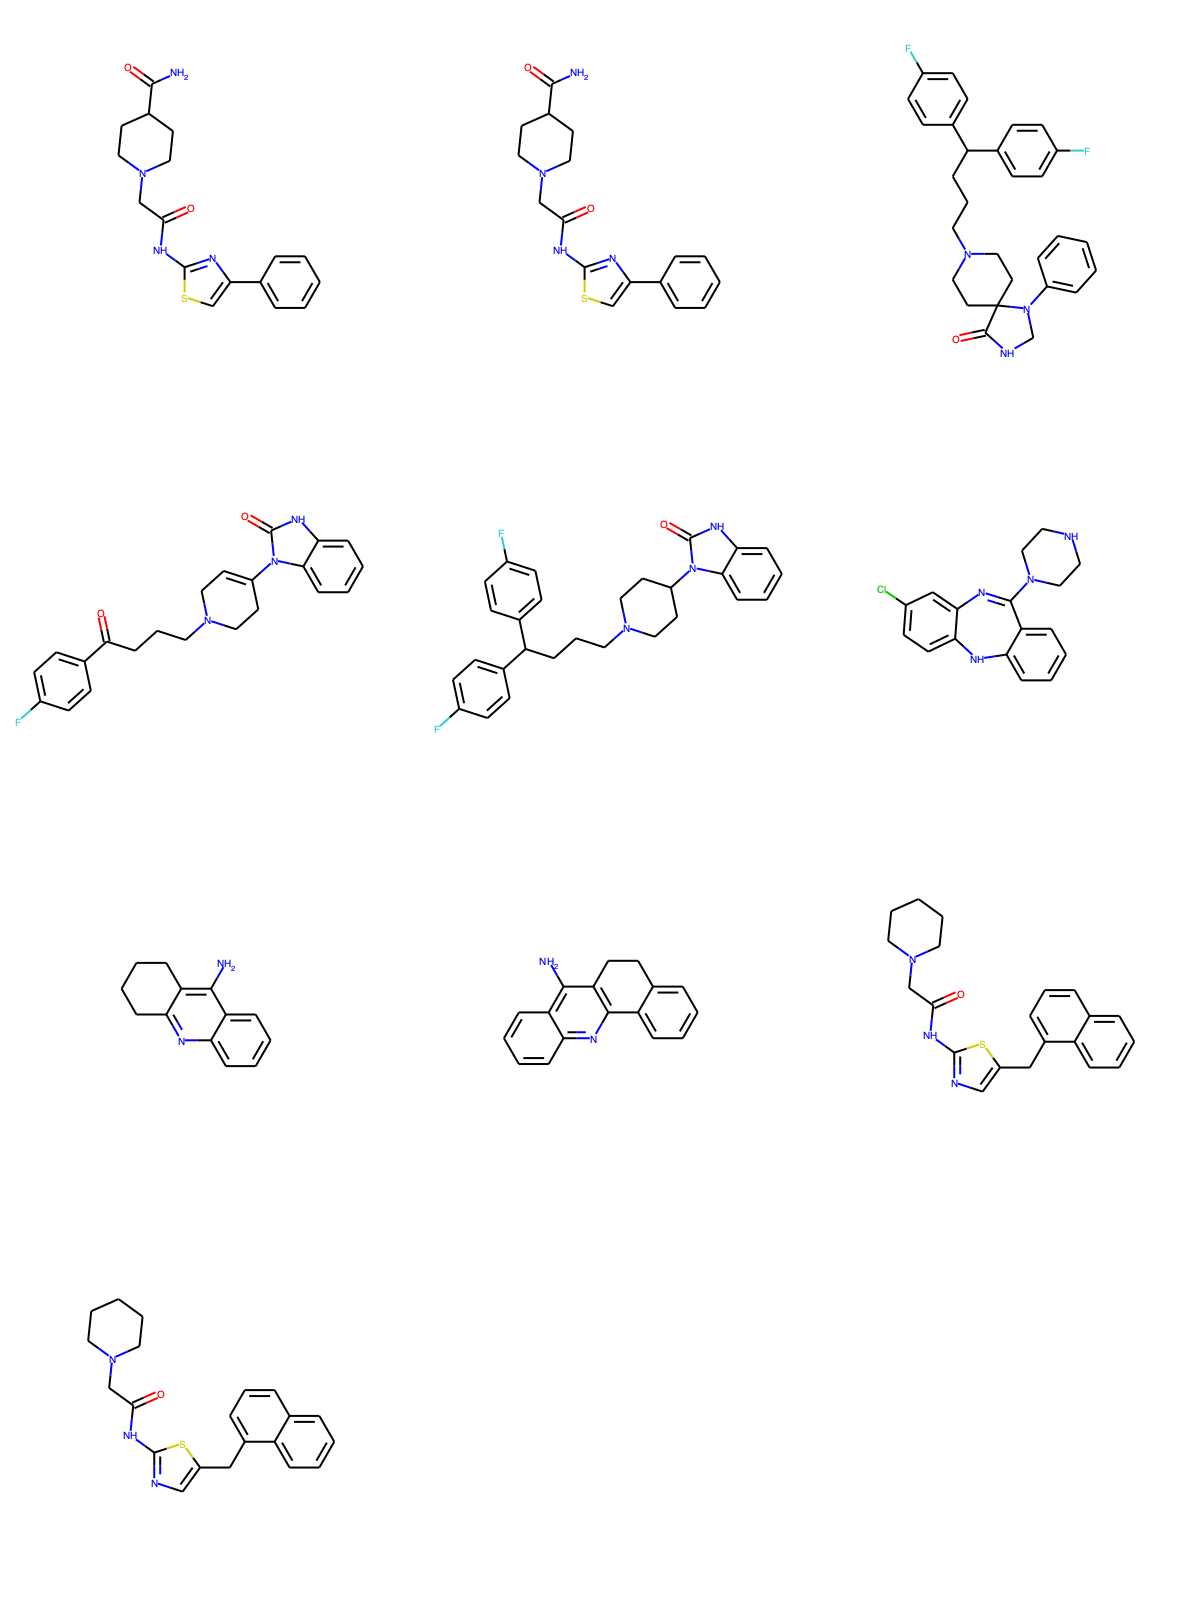

In [79]:
#settimo_et_al.sdf - manually combined literature pKa data
mols = []
smiles = []
pka = []
ref = []
supplier = Chem.SDMolSupplier('settimo_et_al.sdf')
for mol in supplier:
    mols.append(mol)
    smiles.append(mol.GetProp('SMILES'))
    pka.append(mol.GetProp('pKa'))
    ref.append('settimo_et_al')
Draw.MolsToGridImage([mols[x] for x in range(50,60)], subImgSize=[400,400])

In [ ]:
#literature_compilation.sdf - experimental data from multiple publications
#lots of conjugate bases
mols = []
smiles = []
pka = []
ref = []
supplier = Chem.SDMolSupplier('literature_compilation.sdf')
for mol in supplier:
    mols.append(mol)
    smiles.append(Chem.MolToSmiles(mol))
    pka.append(mol.GetProp('pKa'))
    ref.append('literature_compilation')
Draw.MolsToGridImage([mols[x] for x in range(10)], subImgSize=[400,400])

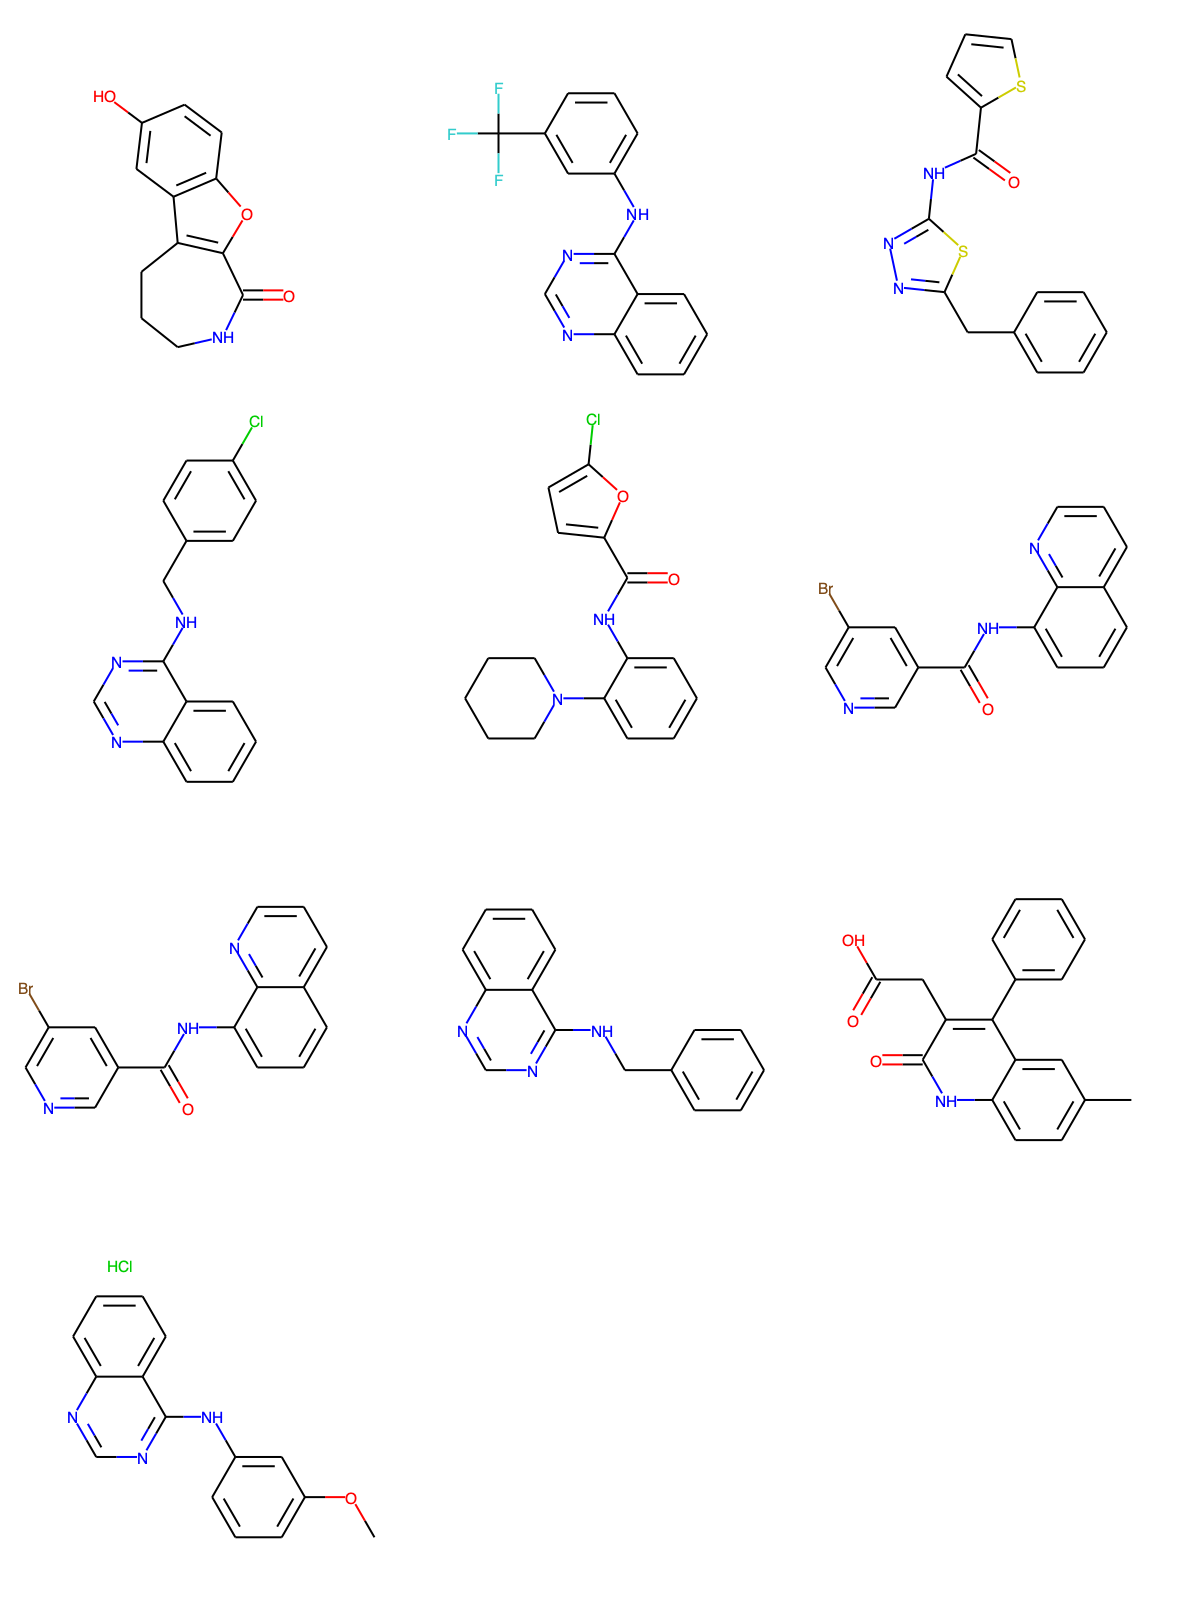

In [81]:
#sampl6.sdf - from the SAMPL6 challenge
#24 molecules, some pKaH
mols = []
smiles = []
pka = []
ref = []
supplier = Chem.SDMolSupplier('sampl6.sdf')
for mol in supplier:
    mols.append(mol)
    smiles.append(Chem.MolToSmiles(mol))
    pka.append(mol.GetProp('pKa'))
    ref.append('sampl6')
Draw.MolsToGridImage([mols[x] for x in range(10)], subImgSize=[400,400])

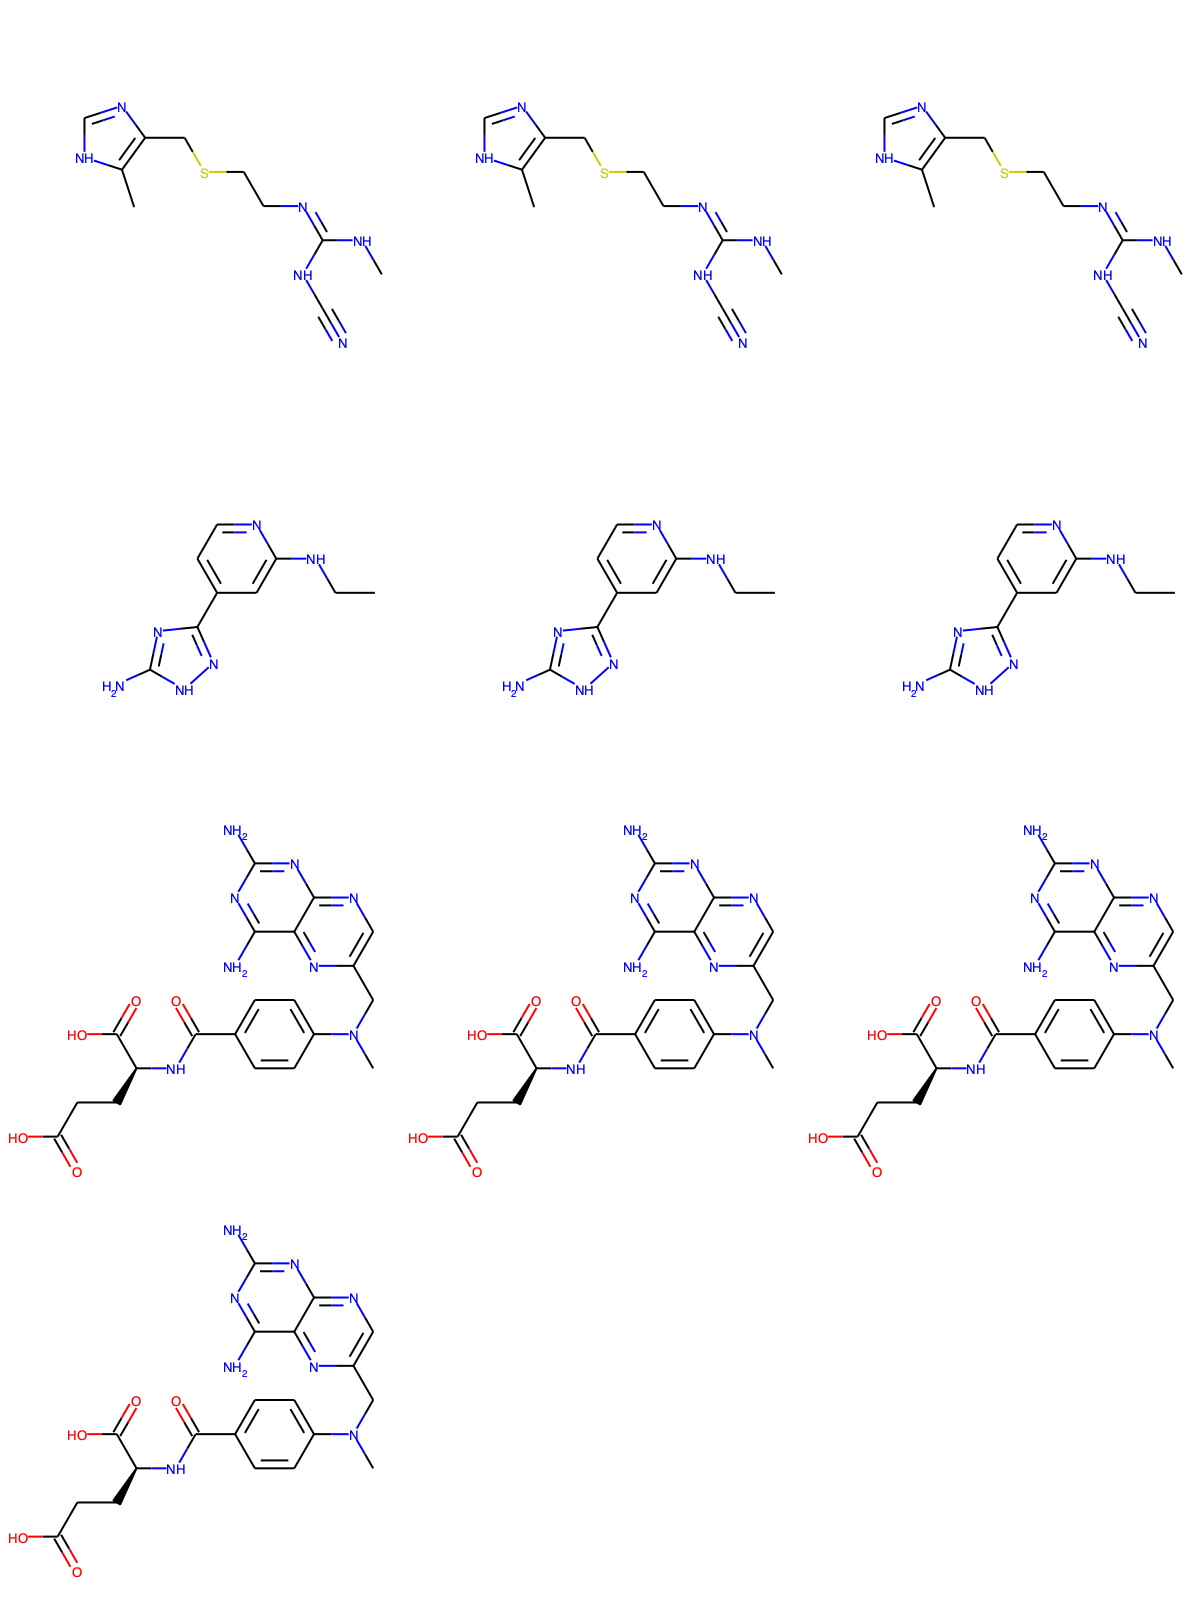

In [83]:
#chembl26.sdf - extracted from ChEMBL26
mols = []
smiles = []
pka = []
ref = []
supplier = Chem.SDMolSupplier('chembl26.sdf')
for mol in supplier:
    mols.append(mol)
    smiles.append(Chem.MolToSmiles(mol))
    pka.append(mol.GetProp('pKa'))
    ref.append('chembl26')

In [ ]:
Draw.MolsToGridImage([mols[x] for x in range(50,60)], subImgSize=[400,400])